<a href="https://colab.research.google.com/github/LLewis/ai-deep-learning/blob/main/LLewis_GradientDescent_2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-25-66527aaaf95d>:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


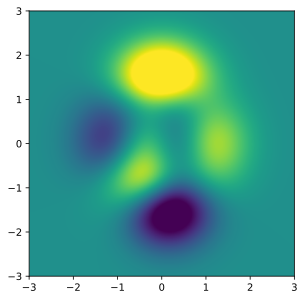

-1.07369833656079

In [25]:
#import all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym # sympy to compute the partial derivatives

from IPython import display
display.set_matplotlib_formats('svg')

# the 'peaks' function
def peaks(x,y):
  # expand to a 2D mesh
  x,y = np.meshgrid(x,y)
  z = 3*(1-x)**2 * np.exp(-(x**2)- (y+1)**2) \
      - 10*(x/5 - x**3 - y**5) * np.exp(-x**2-y**2) \
      - 1/3*np.exp(-(x+1)**2 - y**2)
  return z

#create the landscape - a grid of coordinates from -3 through 3.
x = np.linspace(-3,3,2001)
y = np.linspace(-3,3,2001)

Z = peaks(x,y)  #invoike the peaks function and pass in x and y
#formats and function lanscape based on computations
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')
plt.show()

#create partial derivatives functions using sympy

sx, sy = sym.symbols('sx, sy')

sZ = 3*(1-sx)**2 * sym.exp(-(sx**2)- (sy+1)**2) \
      - 10*(sx/5 - sx**3 - sy**5) * sym.exp(-sx**2-sy**2) \
      - 1/3*sym.exp(-(sx+1)**2 - sy**2)

#create functions from the sympy-computed derivatives
df_x = sym.lambdify((sx, sy), sym.diff(sZ,sx), 'sympy') #will give symbolic view of derivative Zead in reference to x
df_y = sym.lambdify((sx, sy), sym.diff(sZ,sy), 'sympy') #will give symbolic view of derivative Zead in rerence to y

#compute the partial derivative of the function with respect to 'x' for location points 1, 1
df_x(1,1).evalf()




[ 0.01462736 -1.9041607 ]
[0.228278920556369 -1.62553495750000]
[ 0.01462736 -1.9041607 ]


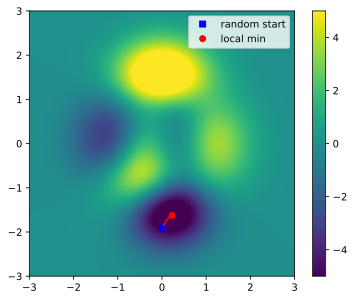

In [40]:
#random starting point (uniform between -2 and +2)
localmin = np.random.rand(2)*4-2  #also try specifying coordinates, rand two numbers
                                  #for the 'x' value and 'y' value between -2 through +2
startpnt = localmin[:]  #make a copy not re-assign
print(startpnt)

#learning parameters
learning_rate = .01
training_epochs = 1000

#run through training
trajectory = np.zeros((training_epochs,2))
for i in range(training_epochs):
  #computing gradient -> an array with two elements
  #the first element is the partial derivative of the function with respect to 'x' at the localmin x and y
  #the second elemment is the partial derivative of the function with respect to 'y' at the localmin x and y
  grad = np.array([df_x(localmin[0], localmin[1]).evalf(),
                   df_y(localmin[0], localmin[1]).evalf()
                   ])
  localmin = localmin - learning_rate*grad # add _ or [:] to change a variable in-place
  trajectory[i,:] = localmin  #storing the trajectory for the visualization

print(localmin) #displays the final localmin
print(startpnt) #displays the starting point - the random generated value

#let's have a look!

#invokes the peaks(x,y) function Z 'zead'
plt.imshow(Z, extent=[x[0],x[-1],y[0],y[-1]], vmin=-5, vmax=5, origin='lower')

#plot data points (dots) according the the start and end (local min)locations
plt.plot(startpnt[0], startpnt[1], 'bs')
plt.plot(localmin[0], localmin[1], 'ro')
#plot the trajectory - shows how the model moved the data points to estimate the localmin over training epochs
plt.plot(trajectory[:,0], trajectory[:,1], 'r')
plt.legend(['random start', 'local min'])
plt.colorbar()
plt.show()
